# COGS 108 - Final Project 

# Overview

In this project, I compared the average unemployment levels and poverty levels vs. the average park ratings among zip codes in San Diego and tried to find if any relationship exists between unemployment levels and poverty levels and average park ratings. I discovered that both higher unemployment levels and poverty levels have form a negative correlation with average park ratings, with the relationship between unemployment levels and park ratings slightly stronger.  

# Name & GitHub

- Name: Ethan Chuang
- GitHub Username: ethan40125

# Research Question

My research question is:
What is the relationship between unemployment levels and poverty levels and the average Yelp rating of parks? 
The scope of this analysis covers the parks and unemployment levels in the city of San Diego, California, and the averages are calculated and compared based on zip codes.

## Background and Prior Work

With over 40,000 acres of park assets and over 400 parks, the City of San Diego provides a robust public park system for its community (1). Through the various environmental, aesthetic, and recreation benefits parks offer to the community, parks significantly improve the quality and wellfare of its surrounding neighborhoods and boost economic development for the overall city (2).

Although the goals of parks are to provide positive experiences for visitors, not everyone goes into a park with the same set of motivations. Most people use parks for recreation, rest and leisure activities, but some use it for their homes. The constant public complaints of homeless populations are costly for the parks and city governments, for many believe they negatively affect the city's public image and drains much attention and budget for cities to carry out measures (3)(4). Poverty and unemployment are both major factors that tie to homelessness (5). With the high cost of living in San Diego, 49% higher than the national average (6), cutting down housing cost is often prioritized by people who are struggling economically. One way to understand the quality of experiences visitors have in parks is through visitor reviews. 

Yelp reviews are a great source of information to understand how a park fares among its visitors based on a 1 (worst) to 5 (best) star rating system. A park that generally provides a poorer quality of experience will receive a lower rating (less stars), and a park that generally provides a positive experience will receive a more favorable rating (more stars). 


References (include links):
- 1)https://www.sandiego.gov/park-and-recreation/general-info
- 2)https://www.brec.org/index.cfm/page/1808/n/153
- 3)https://www.nrpa.org/parks-recreation-magazine/2019/january/addressing-homelessness-in-public-parks/
- 4)https://www.thestar.com/news/gta/2020/11/08/even-with-winter-coming-homeless-people-living-in-park-encampments-want-to-stay.html
- 5)https://www.sheltertas.org.au/wp-content/uploads/2015/03/Homelessness-and-unemployment_Final-Report-20121.pdf
- 6)https://www.sandiegorealestatehunter.com/blog/exposed-real-san-diego-cost-living-guide/

# Hypothesis


I hypothesize that zip codes with higher unemployment levels will have lower average park ratings, and zip codes with higher poverty levels will also result in lower average park ratings. Parks in zip codes with a higher unemployment and poverty levels may represent a larger homeless population, and higher amounts of homeless activities around parks may contribute to more negative experiences for other people at parks.

# Dataset(s)

The ideal dataset for yelp park ratings would include a park's basic information such as names and addresses, ratings, number of reviews, and review comments. The ideal dataset for a California environmental screening report would include examination data on environmental health factors ranging from air, water, land quality to the population economic situations such as poverty and unemployment levels by census tracts. A comparison metric such as percentiles should also be included for each observation so viewers can better understand that data values in relation to the state and national averages.

A dictionary for each dataset should also be provided to guide the reader on what each label means.

The two datasets I will use in this project were provided to me through my instructor, but they can both be accessed online as well. The first dataset can be found on the official Yelp website with some curation work, the second dataset can be found using the California Open Data.

Dataset 1:

Dataset Name: yelp_SD_parks
Link to the dataset: Source: https://www.yelp.com/, curated by my instructor.
Number of observations: 833 observations
This dataset provides Yelp ratings, reviews, general information, and location on parks in San Diego.

Dataset 2:

Dataset Name: calenviroscreen-final-report
Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0d
Number of observations: 8305 observations
This dataset provides a report on the location and various environmental health factors across census tracts in California counties. 

I plan to extract the zip codes from observations in both the Yelp and environment screening report datasets then merge them together into one dataframe with relevant information sorted by zip code. 

# Setup

In [1]:
# Imports - these are the libraries and tools needed for this project
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import geopandas as gpd
from io import StringIO

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Cleaning

Here I remove unwanted data and reformat the remaining data to make it easier to analyze

### Inspect Data

After loading the datasets needed for this project, I do an inspection on the preview and decide which data I won't be using and which data I will.

In [2]:
#load the data used for this project
df_env = pd.read_csv('data/calenviroscreen-final-report.csv')

df_yelp = pd.read_csv('data/yelp_SD_parks.csv')

df_parks = gpd.read_file('data/parks_datasd.geojson')



In [3]:
# Take a look at data
df_yelp

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
5,Centrum Park,"8578 Lightwave Ave San Diego, CA 92123",NaN,yWKbxeS23evuukvzfnFfOQ,https://www.yelp.com/biz/centrum-park-san-dieg...,3.5,22,-117.138397,32.828037,False
6,Presidio Park,"2811 Jackson St San Diego, CA 92110",1.619692e+10,C-qp45deDJqPDio7I-pEGA,https://www.yelp.com/biz/presidio-park-san-die...,4.5,85,-117.195233,32.756713,False
7,Kate O Sessions Memorial Park,"5115 Soledad Rd San Diego, CA 92109",1.858582e+10,HI98gaiQU_cd1OcTR3gE7w,https://www.yelp.com/biz/kate-o-sessions-memor...,4.5,276,-117.239898,32.811316,False
8,Murray Ridge Neighborhood Park,"2559 Escondido Ave San Diego, CA 92123",1.619526e+10,C3U5h7EOfa4s7ii-ny5EHg,https://www.yelp.com/biz/murray-ridge-neighbor...,4.0,20,-117.148097,32.791312,False
9,Olive Grove Park,"5951 Printwood Way San Diego, CA 92117",NaN,GkQt_QzHIT_WHm2vs5cvIA,https://www.yelp.com/biz/olive-grove-park-san-...,4.0,8,-117.171590,32.827435,False


In [4]:
df_env

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)"
5,6071001600,6133,San Bernardino,NaN,80.70,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.465401,92.50,13.888224,...,21.8,84.03,66.539661,91.46,15.71,81.57,79.277015,8.238797,94.58,"Ontario 91761\n(34.0577805, -117.6180131)"
6,6019000902,5252,Fresno,NaN,80.05,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.269893,81.91,14.673231,...,30.3,92.83,81.212589,98.95,32.71,99.72,96.224141,10.000000,100.00,"Fresno 93706\n(36.717768999999997, -119.8042772)"
7,6019000502,3606,Fresno,NaN,78.84,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.335804,86.22,14.496337,...,25.4,88.74,74.430466,96.49,28.80,99.24,94.395625,9.810027,99.99,"Fresno 93701\n(36.744405700000002, -119.781537)"
8,6019000901,3151,Fresno,NaN,77.86,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.258082,81.06,14.718816,...,15.5,72.35,76.216023,97.29,19.22,91.92,91.050458,9.462296,99.76,"Fresno 93706\n(36.710469699999997, -119.804301)"
9,6037206050,2146,Los Angeles,NaN,77.80,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.020888,40.66,12.696653,...,43.1,98.07,67.530065,92.32,32.16,99.67,83.676531,8.696063,97.86,"Los Angeles 90023\n(34.029903599999997, -118.2..."


### Data Cleaning
Trimming down data to keep the most relevant information.

#### Starting with the Yelp park reviews dataset:

In [5]:
# Drop columns that won't be needed 
df_yelp = df_yelp.drop(['name','phone','id','url','longitude','latitude','is_closed'], axis=1)
df_yelp.head()

,address,rating,review_count
0,"1549 El Prado San Diego, CA 92101",5.0,2105
1,"7960 Civita Blvd San Diego, CA 92108",4.5,46
2,"1600 Pacific Hwy San Diego, CA 92101",4.5,242
3,"Adams Ave And Florida St San Diego, CA 92116",4.5,102
4,"413 1st St Coronado, CA 92118",5.0,42


In [6]:
# Check for missing value in rows
df_yelp[df_yelp.isnull().any(axis=1)]
# There are none

,address,rating,review_count


In [7]:
# Separate zip from address and replace column name 'address' with 'zip'
df_yelp['address'] = df_yelp['address'].str.split(' ').str[-1]
df_yelp.rename(columns={'address':'zip'}, inplace = True)
df_yelp.head()

,zip,rating,review_count
0,92101,5.0,2105
1,92108,4.5,46
2,92101,4.5,242
3,92116,4.5,102
4,92118,5.0,42


In [8]:
# Check for unique values
df_yelp['zip'].unique()

array(['92101', '92108', '92116', '92118', '92123', '92110', '92109',
       '92117', '92111', '92130', '92107', '92129', '92131', '92119',
       '92120', '92106', '92104', '92037', '92127', '92124', '92126',
       '92122', '92075', '92103', '92182', '92102', '92078', '91942',
       '91915', '92624', '92071', '92029', '92064', '92074', '92021',
       '92024', '91932', '92136', '92139', '92040', '91945', '91977',
       '91902', '92026', '92121', '92115', '92105', '92113', '91910',
       '92707', '92171', '92114', '91010', '91950', '92014', '90717',
       'CA', '92011', '92065', '92058', '92033', '91941', '92154',
       '92039', '92093', '92166', '92007', '92173', '92025', '90815',
       'Mexico', '92083', '92084', '92008', '92879', '92054', '92020',
       '92627', '92649', '91302', '92132', '91913', '92321', '90069',
       '92128', '92172', '91914', '92835', '92661', '91911', '92626',
       '92027', '90670', '92630', '92145', '92135', '92009', '92038',
       '92057', '92023

In [9]:
# Since there are non-zipcode values (CA and Mexico), these rows will be dropped 
df_yelp = df_yelp[df_yelp['zip'].apply(lambda x: x.isnumeric())]

In [10]:
# Double check
df_yelp['zip'].unique()
# The non-zipcodes are removed

array(['92101', '92108', '92116', '92118', '92123', '92110', '92109',
       '92117', '92111', '92130', '92107', '92129', '92131', '92119',
       '92120', '92106', '92104', '92037', '92127', '92124', '92126',
       '92122', '92075', '92103', '92182', '92102', '92078', '91942',
       '91915', '92624', '92071', '92029', '92064', '92074', '92021',
       '92024', '91932', '92136', '92139', '92040', '91945', '91977',
       '91902', '92026', '92121', '92115', '92105', '92113', '91910',
       '92707', '92171', '92114', '91010', '91950', '92014', '90717',
       '92011', '92065', '92058', '92033', '91941', '92154', '92039',
       '92093', '92166', '92007', '92173', '92025', '90815', '92083',
       '92084', '92008', '92879', '92054', '92020', '92627', '92649',
       '91302', '92132', '91913', '92321', '90069', '92128', '92172',
       '91914', '92835', '92661', '91911', '92626', '92027', '90670',
       '92630', '92145', '92135', '92009', '92038', '92057', '92023',
       '91916', '920

In [11]:
# calculate the mean yelp rating for parks in each zip code
df_yelp = df_yelp.groupby(['zip']).mean()

#### Now moving on to the Environmental Health data set:

In [12]:
df_env

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)"
5,6071001600,6133,San Bernardino,NaN,80.70,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.465401,92.50,13.888224,...,21.8,84.03,66.539661,91.46,15.71,81.57,79.277015,8.238797,94.58,"Ontario 91761\n(34.0577805, -117.6180131)"
6,6019000902,5252,Fresno,NaN,80.05,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.269893,81.91,14.673231,...,30.3,92.83,81.212589,98.95,32.71,99.72,96.224141,10.000000,100.00,"Fresno 93706\n(36.717768999999997, -119.8042772)"
7,6019000502,3606,Fresno,NaN,78.84,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.335804,86.22,14.496337,...,25.4,88.74,74.430466,96.49,28.80,99.24,94.395625,9.810027,99.99,"Fresno 93701\n(36.744405700000002, -119.781537)"
8,6019000901,3151,Fresno,NaN,77.86,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.258082,81.06,14.718816,...,15.5,72.35,76.216023,97.29,19.22,91.92,91.050458,9.462296,99.76,"Fresno 93706\n(36.710469699999997, -119.804301)"
9,6037206050,2146,Los Angeles,NaN,77.80,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.020888,40.66,12.696653,...,43.1,98.07,67.530065,92.32,32.16,99.67,83.676531,8.696063,97.86,"Los Angeles 90023\n(34.029903599999997, -118.2..."


In [13]:
# Update the dataframe to show only data for San Diego County instead of counties across California
df_env = df_env[df_env['California County'] == 'San Diego']
# Keep the columns I need
df_env = df_env[['Poverty', 'Unemployment', 'Location 1']]
# Simplify address to zip code and rename column
df_env[['zip', 'Loc']] = df_env['Location 1'].str.split('\n', expand = True)
df_env['zip'] = df_env['zip'].str.split(' ').str[-1]
df_env = df_env.drop(columns = ['Location 1','Loc'])

In [14]:
# Check for missing values 
df_env[df_env.isnull().any(axis=1)]

,Poverty,Unemployment,zip
165,74.855946,NaN,92113
4595,47.180548,NaN,92110
5568,NaN,NaN,92136
6856,NaN,3.53,92118
7512,NaN,NaN,92106
7565,NaN,10.86,91913
7694,NaN,NaN,92135
7829,NaN,9.94,92129
8020,NaN,NaN,92134
8021,NaN,NaN,92101


In [15]:
# Remove rows with missing values
df_env = df_env.dropna()

In [16]:
# double check
df_env[df_env.isnull().any(axis=1)]

,Poverty,Unemployment,zip


In [17]:
# Average the poverty and unemployment level for each zip code
df_env = df_env.groupby(['zip']).mean()
df_env

,Poverty,Unemployment
zip,,
91901,24.751687,7.572500
91902,16.708080,7.954000
91906,40.386137,14.940000
91910,32.053019,12.301765
91911,42.463159,16.949333
91913,22.169318,8.676667
91914,19.032858,9.960000
91915,15.431741,5.570000
91916,14.163090,4.860000


## Merging dataframes

After cleaning both the yelp park rating dataframe and environmental screening dataframe and organizing their values by zipcode, I will now combine the two dataframes for better comparison and analysis.

In [18]:
df_merge = pd.merge(df_yelp, df_env, on=['zip'])

In [19]:
#capitalize column headings for consistency
df_merge.rename(columns={'rating':'Rating','review_count':'Review_count'}, inplace = True)
df_merge

,Rating,Review_count,Poverty,Unemployment
zip,,,,
91902,4.125000,63.000000,16.708080,7.954000
91910,4.000000,45.875000,32.053019,12.301765
91911,1.000000,5.000000,42.463159,16.949333
91913,3.000000,60.000000,22.169318,8.676667
91914,4.000000,2.000000,19.032858,9.960000
91915,4.500000,24.333333,15.431741,5.570000
91916,4.500000,209.500000,14.163090,4.860000
91932,4.166667,67.333333,43.360367,15.171667
91941,3.800000,37.400000,22.032756,8.934444


# Data Analysis & Results

### Overview
Here I get a general overview for the merged dataframe.

In [20]:
df_merge.describe()

,Rating,Review_count,Poverty,Unemployment
count,74.000000,74.000000,74.000000,74.000000
mean,3.915462,106.729579,30.082176,9.270634
std,0.652337,148.337565,13.739130,2.922658
min,1.000000,1.000000,6.235200,2.540000
25%,3.761176,24.083333,20.705919,6.916875
50%,4.000000,53.750000,26.863377,9.027714
75%,4.250000,121.130682,39.228954,11.157857
max,5.000000,809.074074,71.576220,18.342500


### Data Visualization
Here I plot graphs to see the general trends and relationships that exist within my data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187C6A4C048>,
      dtype=object)

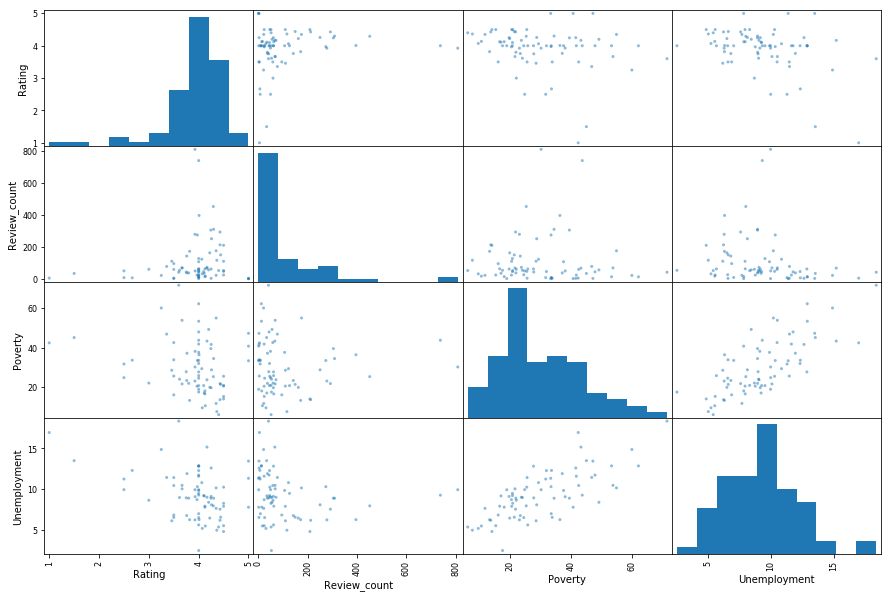

In [21]:
# Plot scatter matrix for my merged dataframe
pd.plotting.scatter_matrix(df_merge,figsize=(15, 10))

Here I get a closer look on distributions and relationships between variables

Text(0.5, 1.0, 'Yelp Ratings Distribution')

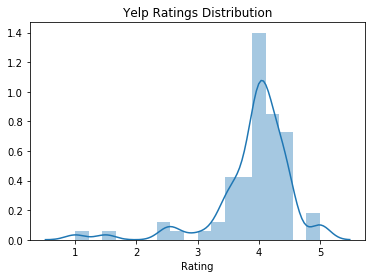

In [22]:
sns.distplot(df_merge['Rating'])
plt.title('Yelp Ratings Distribution')

Text(0.5, 1.0, 'Unemployment Levels vs. Park Ratings')

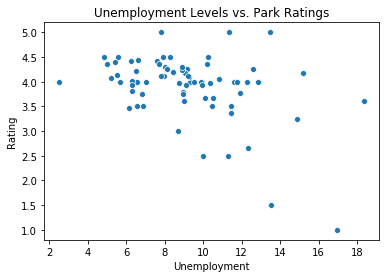

In [23]:
sns.scatterplot(x='Unemployment', y='Rating', data=df_merge)
plt.title('Unemployment Levels vs. Park Ratings')

Text(0.5, 1.0, 'Poverty levels vs. Park Ratings')

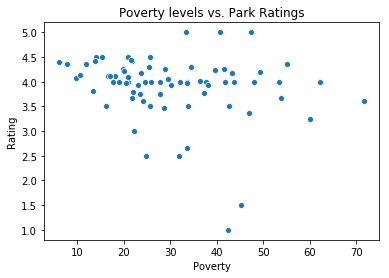

In [24]:
sns.scatterplot(x='Poverty', y='Rating', data=df_merge)
plt.title('Poverty levels vs. Park Ratings')

### Regression Analysis
Here I perform OLS regressional analysis on my data. 

In [25]:
# Regression analysis on Unemployment Level vs. Avg. Park Rating
outcome, predictors = patsy.dmatrices('Rating ~ Unemployment', df_merge)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     13.31
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           0.000497
Time:                        01:29:30   Log-Likelihood:                -66.610
No. Observations:                  74   AIC:                             137.2
Df Residuals:                      72   BIC:                             141.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.7327      0.235     20.160   

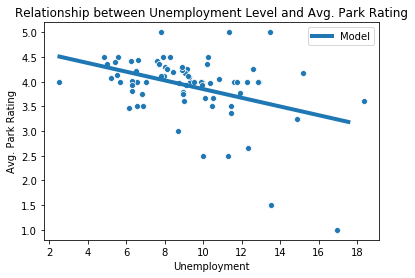

In [26]:
# Plot scatterplot with best-fit line
sns.scatterplot(x='Unemployment', y='Rating', data=df_merge)

#generate model fit line
xs = np.arange(df_merge['Unemployment'].min(), df_merge['Unemployment'].max())
ys = -0.0882 * xs + 4.7327
plt.plot(xs, ys, lw=4, label='Model')

plt.xlabel('Unemployment')
plt.ylabel('Avg. Park Rating')
plt.title('Relationship between Unemployment Level and Avg. Park Rating')
plt.legend();

The above graph between unemployment level and park rating shows that there is a negative correlation between these two variables.

In [27]:
# Regression analysis on Poverty Levevl vs. Avg. Park Rating
outcome, predictors = patsy.dmatrices('Rating ~ Poverty', df_merge)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.554
Date:                Thu, 17 Dec 2020   Prob (F-statistic):             0.0635
Time:                        01:29:30   Log-Likelihood:                -71.103
No. Observations:                  74   AIC:                             146.2
Df Residuals:                      72   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2252      0.180     23.416      0.0

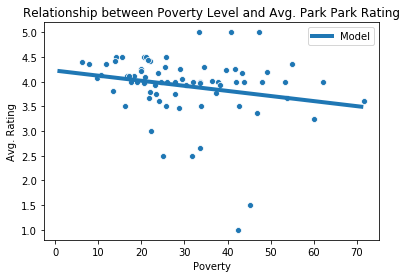

In [28]:
# Plot scatterplot with best-fit line
sns.scatterplot(x='Poverty', y='Rating', data=df_merge)

#generate model fit line
xs = np.arange(df_merge['Rating'].min(), df_merge['Poverty'].max())
ys = -0.0103  * xs + 4.2252 
plt.plot(xs, ys, lw=4, label='Model')

plt.xlabel('Poverty')
plt.ylabel('Avg. Rating')
plt.title('Relationship between Poverty Level and Avg. Park Park Rating')
plt.legend();

The graph between poverty level and park rating shows that there is a negative correlation between these two variables.

In addition, there is a stronger negative correlation between unemployment levels and park ratings than between poverty levels and park ratings. 
**Unemployment level vs poverty levels; 
R-squared(how much data are explained by best fit line):0.156 vs 0.047; 
slope (stronger negative correlation): -0.0882 vs -0.0103 

# Ethics & Privacy

I obtained the datasets used in this project from my instructor, so I have permission to access and use these data. Both these data are sourced from the internet's public domain, so even if the data were not provided I could still obtain them individually and proceed with my projects. This project is not used for commercial purposes.

Both datasets I used in this project do not contain information that exposes individual identities. Therefore, none of the rows or columns in my dataset needed to be dropped for ethical reasons. The addresses in the datasets are for census tracts and public parks, which are both knowledge accessible to the public. 

There may be biases in my analysis.
The Yelp review counts were kept in my analysis because I wanted to visualize the distribution of Yelp reviews. Turns out, the distribution of Yelp reviews was heavily right-skewed, indicating that a high number of public parks in San Diego have little to no reviews. As a result, the parks with few reviews would hold a disproportionally larger weight when calculating the average rating of parks in a given zip code. Knowing this, I proceeded with my analysis anyway because I reason that parks with few reviews still represent visitors' experience at parks, and over the long run, the very high and low ratings of parks with little reviews shall balance out to the average.
Another possible bias in my analysis is that although there may be a negative correlation between poverty/unemployment levels and park ratings, the correlation may be better explained by a lurking variable that I did not anticipate (ex. unemployed people are in generally worse mood, more prone to giving negative ratings). Therefore, the results of this project cannot be used to infer causation.
Yet another possible bias is that since I calculated averages of unemployment/poverty levels and park ratings based on zip codes, the average values used in my analysis may be skewed due to few extreme values. 

One unintended consequence for this project is that one may quickly presume that the negative correlation between unemployment and average park ratings result from the homeless population, and blame the negative reviews of public parks on the homeless population. Any insights gained from this project do not justify hateful language or behavior towards the homeless population.

I do not know how accurate the datasets used in this project are since they were provided to me. Errors may have been made  during the collection of datasets, including individual variance between environmental health screeners, and typo's.



# Conclusion & Discussion

In this project, I compared the average unemployment and poverty levels and average park ratings among zip codes in San Diego and tried to find if any relationship exists between unemployment and poverty level vs. average park ratings. I notice that there exists negative correlations between both unemployment levels and poverty levels vs. average park ratings. I first cleaned my each my datasets used for this project. Then I merge them into one dataframe for a smoother analysis. Finally, I use regression analysis to see if there are any relationships between the variables in my dataset.  

My hypothesis that zip codes with higher unemployment levels and higher poverty levels correspond to lower average park ratings match the results of my analysis. However, as mentioned in the abov section, there may be several limitations regarding my conclusion. Firstly, there may be many contributing factors as to why higher unemployment levels and poverty levels correlate with more negative park reviews (such as city budget and other environment conditions). Secondly, using a linear regression model to draw conclusions for the relationship between unemployment and poverty levels vs park ratings may be overly simple, as other models and tools may provide a more suitible approach to analyzing my data.   

This project provides the insight to San Diego city officials that areas with higher unemployment and poverty levels tend to have lower park ratings, and it may help the city to better decide how to allocate its resources to improve park ratings and therefore the park experience for its residents.

This project may also open ways for future research and analysis and what further factors tied to unemployment and poverty levels contribute to lower ratings of parks, as well as to examine why there is a stronger negative correlation between unemployment levels and park ratings than poverty levels and park ratings.
